## Dynamical analysis: Convergence and Errors - Step 1

We want to compute the `Dynamical Structure Factor`, which is given by

$$ S_{\vec{q}}(w) = \sum_{n=1}^{nev} \left| \left\langle \Psi_n^X \left| \hat{S}_{\vec{q}}^{\alpha} \right| \Psi_0 \right\rangle \right| ^2 \delta(\omega - (E_n^X - E_0)) $$

$$ S_{\vec{q}}(w) = \sum_{n=1}^{nev} \left| \left\langle \Psi_n^X \left| \hat{S}_{\vec{q}}^{\alpha} \right| \Psi_0 \right\rangle \right| ^2 \frac{1}{\pi} \frac{\epsilon^2}{(\omega - (E_n^X - E_0))^2 + \epsilon^2} $$

Where

$$ \hat{S}_{\vec{q}}^{\alpha} = \frac{1}{\sqrt{L}} \sum_{i = 0}^{L-1} e^{i \vec{q} \cdot \vec{r}_i} \hat{S}_i^{\alpha} $$

So, we can rewrite the DSF as:
$$ S_{\vec{q}}(w) = \sum_{n=1}^{nev} \left| \left\langle \Psi_n^X \left| \frac{1}{\sqrt{L}} \sum_{i=0}^{L-1} e^{i \vec{q} \cdot \vec{r}_i} \hat{S}_i^{\alpha} \right| \Psi_0 \right\rangle \right| ^2 \frac{1}{\pi} \frac{\epsilon^2}{(\omega - (E_n^X - E_0))^2 + \epsilon^2} $$

$$ S_{\vec{q}}(w) = \sum_{n=1}^{nev} \left| \frac{1}{\sqrt{L}} \sum_{i=0}^{L-1} e^{i \vec{q} \cdot \vec{r}_i} \left\langle \Psi_n^X \left| \hat{S}_i^{\alpha} \right| \Psi_0 \right\rangle \right| ^2 \frac{1}{\pi} \frac{\epsilon^2}{(\omega - (E_n^X - E_0))^2 + \epsilon^2} $$

From the code we obtain a file with two columns: 
1. the first one, has the values of $ \Delta_n = E_n^X -E_0 $
2. the second one, has the values of the coefficient $ \left\langle \Psi_n^X \left| \hat{S}_i^{\alpha} \right| \Psi_0 \right\rangle $

In [1]:
import numpy as np
import cmath as m
import matplotlib.pyplot as plt
import csv
import scipy.stats
from mpl_toolkits.mplot3d import axes3d
#%matplotlib notebook

### Parameters

In [2]:
# Lattice

dim      = 2           # Dimension of the lattice
nspins   = 24          # Number of spins in the system
Lx       = 4           # Number of spins in the system in x direction
Ly       = 6           # Number of spins in the system in y direction
rep      = 10         # Disorder realizations
nev      = 200         # Number of excited states used

In [3]:
# Reciprocal lattice

nQ       = nspins       # Number of q values to analyse

In [4]:
# Hamiltonian parameters

J1           = 1.0      # Nearest neighbours coupling
D1           = 0.0      # Nearest neighbours anisotropy
J2           = 0.40      # Next-nearest neighbours coupling
D2           = 0.0      # Next-nearest neighbours anisotropy
dis_strength = 1.0      # Strength of the disorder

In [5]:
# Frequency parametes

nW       = 5001         # Number of frequency values to plot
w_min    = 0            # Minimum value of frequency to plot
w_max    = 5            # Maximum value of frequency to plot
epsilon  = 1.0/nspins   # Constant to compute the Dirac delta function

In [6]:
# Files

root        = '/home/ale/MAIN24/'

pathINdata  = root + 'dis' + str(dis_strength) + '/' + str(nspins) + 'nnn' + "{:2.2f}".format(J2) + '/'
pathOUTdata = root + 'dis' + str(dis_strength) + '/' + str(nspins) + 'nnn' + "{:2.2f}".format(J2) + '/'

### 1. Read data from files

In [7]:
tmp_Sw = np.zeros((rep,nQ,nW))
Sw     = np.zeros((nW,nQ))

with open(pathINdata + 'Sq.csv') as csvfile:
        tmp_read_Sw = np.genfromtxt(csvfile)
Sw = tmp_read_Sw[:,1:]

for dis_rep in range(rep):
    with open(pathINdata + 'Sq/Sq_' + str(dis_rep) + '.csv') as dis_csvfile:
        tmp_read_Sw_dis = np.genfromtxt(dis_csvfile)
    tmp_Sw[dis_rep,:,:] = tmp_read_Sw_dis[:,1:].T

### 2. Check distribution of data

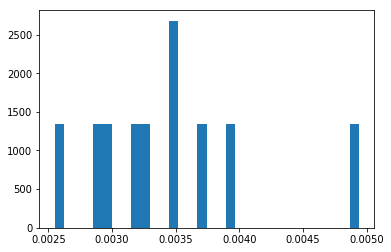

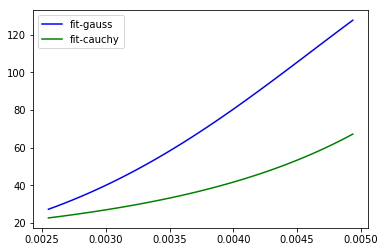

In [10]:
# One should obtain a Gaussian profile when doing a histogram of the Sq(w) values, for a particular q and w values
which_w = 800

hist, bins, patches = plt.hist(tmp_Sw[:,10,which_w],bins=32,density=True)
plt.show()

# Fit the distribution
mean, var = scipy.stats.norm.fit(tmp_Sw[:,15,which_w])
x = np.linspace(bins[0],bins[32],100)
p = scipy.stats.norm.pdf(x,mean,var)
plt.plot(x,p,'k',label='fit-gauss',color='b')

mean2, std2 = scipy.stats.cauchy.fit(tmp_Sw[:,15,which_w])
x2 = np.linspace(bins[0],bins[32],100)
p2 = scipy.stats.cauchy.pdf(x2,mean2,std2)
plt.plot(x2,p2,'k',label='fit-cauchy',color='g')
plt.legend()

#mean3, std3 = scipy.stats.exponnorm.fit(tmp_Sw[:,10,which_w])
#x3 = np.linspace(bins[0],bins[32],100)
#p3 = scipy.stats.exponnorm.pdf(x3,mean3,std3)
#plt.plot(x3,p3,'k',label='fit-expon',color='r')
#plt.legend()

#plt.text(0.3,20,'mean: {:2.4f}'.format(meanAF) + '\n' + 'std: {:2.4f}'.format(m.sqrt(stdAF).real))

### 3. Check convergibility

In [9]:
# For a particular w and q values, plot Sq(w) values for different amounts of disorder realizations averaged
pi       = np.arccos(-1)

check_Sw = np.zeros((rep,nQ,nW))
for dis_rep in range(rep):
    check_Sw[dis_rep,:,:] = check_Sw[dis_rep-1,:,:] + tmp_Sw[dis_rep,:,:]
    
e_msg = "Steps do not match"
for wi in range(nW):
    assert (check_Sw[1,10,wi]-tmp_Sw[0,10,wi]-tmp_Sw[1,10,wi])<1e-15, e_msg
    assert (check_Sw[999,10,wi]*2*pi/rep-Sw[wi,10])<1e-10, e_msg

check_Sw *= 2*pi

print(check_Sw[999,10,:].shape, Sw[:,10].shape)
for dis_rep in range(1,rep):
    check_Sw[dis_rep,:,:] /= (dis_rep+1)

for wi in range(nW):
    assert (check_Sw[999,10,wi]-Sw[wi,10])<1e-13, e_msg
    
# Plot the cummulative values
d = np.linspace(0,rep-1,rep)
plt.plot(d,check_Sw[:,10,2345])

IndexError: index 999 is out of bounds for axis 0 with size 10